In [1]:
import pandas as pd
import sklearn as sk
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
Df3 = pd.read_csv('3Buckets.csv')
Df5 = pd.read_csv('5Buckets.csv')
Df8 = pd.read_csv('8Buckets.csv')
Df12 = pd.read_csv('12Buckets.csv')

In [3]:
Df12.head()

,Year,Team,Safeties,Corners,InsideBackers,Edge,InteriorDLine,WRs,TEs,InteriorOLine,Tackles,QB,RB,Special,Dead,IR,Prac,Susp,Wins,Playoff Wins,SuperBowl Win
0,2005,cardinals,8.02,3.09,2.08,9.11,1.47,8.76,0.44,15.55,5.49,6.72,0.81,3.03,8.08,0.16,0.09,0.0,5,0,0
1,2006,cardinals,9.22,0.95,2.46,11.08,3.72,11.23,0.81,20.40,3.43,6.87,10.18,1.76,1.18,0.61,0.15,0.0,5,0,0
2,2007,cardinals,8.73,1.48,3.39,11.32,1.64,10.80,0.95,10.49,5.60,8.55,7.57,1.13,2.07,13.01,0.08,0.0,8,0,0
3,2008,cardinals,8.13,2.29,9.81,8.31,3.75,11.07,1.67,11.33,13.31,7.49,7.27,0.80,4.09,0.23,0.32,0.0,9,3,0
4,2009,cardinals,10.10,8.03,10.46,6.54,7.00,14.14,0.66,9.37,8.26,12.29,4.53,2.21,6.92,5.68,0.21,0.0,10,1,0


In [9]:
## Test if normalization by year affects the analysis
labels = ['Safeties','Corners','InsideBackers','Edge','InteriorDLine','WRs','TEs','InteriorOLine','Tackles','QB','RB','Special']
Df12Normalized = Df12.copy()

def Normalize(x):
    RetList = []
    for label in labels:
        dfyear = Df12Normalized[Df12Normalized['Year'] == x['Year']]
        val = (x[label] - np.mean(dfyear[label]))/(np.std(dfyear[label]))
        
        RetList.append(val)
    
    return pd.Series(RetList)
    
    
    
Df12Normalized[labels] = Df12Normalized.apply(Normalize, axis = 1)   

In [11]:
X = Df12[['Safeties','Corners','InsideBackers','Edge','InteriorDLine','WRs','TEs','InteriorOLine','Tackles','QB','RB','Special']]
NonPredictorX = Df12[['Year','Team']]
Y = Df12[['Wins', 'Playoff Wins', 'SuperBowl Win']]

X_Norm = Df12Normalized[['Safeties','Corners','InsideBackers','Edge','InteriorDLine','WRs','TEs','InteriorOLine','Tackles','QB','RB','Special']]
NonPredictorX_Norm = Df12Normalized[['Year','Team']]
Y_Norm = Df12Normalized[['Wins', 'Playoff Wins', 'SuperBowl Win']]

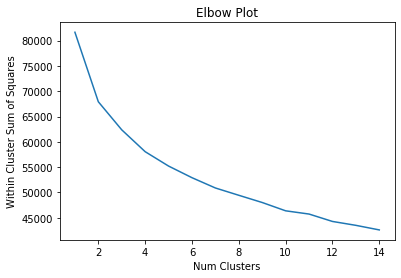

Seemingly the best number of clusters is around 10, will try between 7,10,12


In [16]:
## Elbow Plot
models = []
wcss = []
for i in range(1,15): 
    i = int(i)
    KM = KMeans(n_clusters = i, random_state = 0, init = "k-means++", n_init = 10)
    KM.fit(X)
    wcss.append(KM.inertia_)
    
plt.plot(range(1,15),wcss)
plt.title("Elbow Plot")
plt.xlabel("Num Clusters")
plt.ylabel("Within Cluster Sum of Squares")

plt.show()
print("Seemingly the best number of clusters is around 10, will try between 7,10,12")

## 7 Clusters (Not Normalized)

In [106]:
## 7 clusters
KM12_7 = KMeans(n_clusters = 25, random_state = 0, init = "k-means++", n_init = 100)
KM12_7.fit(X)
Df12_7Clust = Df12.copy()
Df12_7Clust['Cluster'] = KM12_7.labels_
KM12_7.cluster_centers_

array([[ 6.251     ,  4.244     ,  3.656     ,  1.327     , 11.993     ,
        10.603     ,  1.949     ,  6.        ,  7.205     , 11.131     ,
         4.158     ,  2.277     ],
       [ 7.46516129,  5.66225806,  3.71483871, 12.56483871,  3.86354839,
         8.32806452,  4.34580645, 12.53806452,  6.93354839, 12.78774194,
         5.09870968,  2.66258065],
       [ 4.60470588,  6.42647059,  3.24058824, 23.09588235,  6.21411765,
         6.38529412,  5.50647059,  9.22882353,  4.55294118,  6.04588235,
         7.11823529,  2.62647059],
       [10.21909091,  7.23227273,  4.615     , 21.11136364,  4.82272727,
         8.48909091,  4.73545455,  7.42636364,  7.52818182, 11.11863636,
         4.95590909,  3.09818182],
       [ 3.72578947,  5.23789474,  2.44315789,  4.59421053,  2.25263158,
         9.90105263,  1.72421053,  2.79842105,  5.81578947,  7.14526316,
         3.07      ,  1.59473684],
       [ 5.42714286,  8.53904762,  5.91285714, 14.28904762,  5.95904762,
         9.52047619,  

In [107]:
##Match Averages spending back to groupby to gain cluster averages for all metrics
Df12_7_GB = Df12_7Clust.groupby(by = "Cluster")[['SuperBowl Win', "Playoff Wins",'Wins']].mean()
Df12_7_GB.reset_index(inplace = True)
labs = X.columns
# for lab in labs:
#     Df5_3_GB[lab] = 0

for i in range (0,len(KM12_7.cluster_centers_)):
    k_m = 0
    for lab in labs:
        val = KM12_7.cluster_centers_[i][k_m]
        Df12_7_GB.set_value(i,lab,val)
        k_m+=1
        

for i in range(0,len(Df12_7_GB)):
    TC = 0
    for j in range(4,16):
        TC += Df12_7_GB.iloc[i,j]
    Df12_7_GB.set_value(i,'TotCap',TC)
    
Df12_7_GB['Count'] = Df12_7Clust.groupby(by = "Cluster")['Year'].count()
Df12_7_GB

C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Cluster,SuperBowl Win,Playoff Wins,Wins,Safeties,Corners,InsideBackers,Edge,InteriorDLine,WRs,TEs,InteriorOLine,Tackles,QB,RB,Special,TotCap,Count
0,0,0.000000,0.600000,8.800000,6.251000,4.244000,3.656000,1.327000,11.993000,10.603000,1.949000,6.000000,7.205000,11.131000,4.158000,2.277000,70.794000,10
1,1,0.000000,0.290323,7.000000,7.465161,5.662258,3.714839,12.564839,3.863548,8.328065,4.345806,12.538065,6.933548,12.787742,5.098710,2.662581,85.965161,31
2,2,0.000000,0.294118,7.529412,4.604706,6.426471,3.240588,23.095882,6.214118,6.385294,5.506471,9.228824,4.552941,6.045882,7.118235,2.626471,85.045882,17
3,3,0.045455,0.636364,8.681818,10.219091,7.232273,4.615000,21.111364,4.822727,8.489091,4.735455,7.426364,7.528182,11.118636,4.955909,3.098182,95.352273,22
4,4,0.000000,0.157895,6.578947,3.725789,5.237895,2.443158,4.594211,2.252632,9.901053,1.724211,2.798421,5.815789,7.145263,3.070000,1.594737,50.303158,19
5,5,0.000000,0.047619,7.333333,5.427143,8.539048,5.912857,14.289048,5.959048,9.520476,4.404762,8.492857,11.760952,4.674286,7.033333,2.676190,88.690000,21
6,6,0.040000,0.600000,8.960000,3.822000,4.681600,7.296800,11.972000,2.614400,5.797600,2.558000,5.800000,4.445600,12.652800,6.832400,1.683200,70.156400,25
7,7,0.047619,0.380952,8.619048,4.455714,4.753810,9.215238,6.237143,6.342381,5.246190,1.924762,4.769048,4.074762,6.543810,4.770952,1.734762,60.068571,21
8,8,0.000000,0.266667,7.266667,4.878000,6.550000,4.350000,21.357333,5.701333,15.800667,4.802667,8.926667,9.880667,6.758000,3.484000,2.340667,94.830000,15
9,9,0.000000,0.545455,8.954545,6.029545,11.905455,4.911818,17.434545,5.536818,11.795455,5.668182,7.123636,4.994091,12.846818,6.049091,3.278636,97.574091,22


In [99]:
ClusterDescriptions12_5 = {0:"",1:"",2:"",3:"",4:""}
ClusterDescriptions12_5[0] = "Pays corners, inside backers, QBs more than any other cluster, pays Interior Dline, RBs less than other clusters"
ClusterDescriptions12_5[1] = "Pays almost every position the least, uses only about 57% of cap space anyways"
ClusterDescriptions12_5[2] = "Pays Safeties, WRs, QBs the most, pays Corners the least, uses about 83% of cap space"
ClusterDescriptions12_5[3] = "Pays Edge players, WRs, TEs, RBs the most, pays Inside Backers the least, uses about 92% of cap space"
ClusterDescriptions12_5[4] = "Pays Interior Dline the most BY FAR, also Interior Oline, RBs, and Special teamers the most, uses about 91% of cap space "

In [100]:
ClusterDescriptions12_5

{0: 'Pays corners, inside backers, QBs more than any other cluster, pays Interior Dline, RBs less than other clusters',
 1: 'Pays almost every position the least, uses only about 57% of cap space anyways',
 2: 'Pays Safeties, WRs, QBs the most, pays Corners the least, uses about 83% of cap space',
 3: 'Pays Edge players, WRs, TEs, RBs the most, pays Inside Backers the least, uses about 92% of cap space',
 4: 'Pays Interior Dline the most BY FAR, also Interior Oline, RBs, and Special teamers the most, uses about 91% of cap space '}

In [59]:
for c in range(0,5):
    for w in range(0,17):
        print ("Wins: " + str(w) + "   " "Cluster: " + str(c))
        print (Df12_7Clust[(Df12_7Clust['Cluster'] == c)&(Df12_7Clust['Wins'] == w)]['Team'].value_counts())


,Year,Team,Safeties,Corners,InsideBackers,Edge,InteriorDLine,WRs,TEs,InteriorOLine,Tackles,QB,RB,Special,Dead,IR,Prac,Susp,Wins,Playoff Wins,SuperBowl Win,Cluster
29,2019,falcons,5.54,10.07,2.98,14.75,8.99,10.32,3.44,14.21,7.67,9.49,5.00,4.22,9.83,17.16,0.08,0.29,7,0,0,4
36,2011,ravens,9.55,10.63,8.09,16.63,7.84,10.19,2.15,12.44,3.46,4.86,4.31,3.53,3.14,6.98,0.56,0.00,12,2,0,4
37,2012,ravens,12.31,12.21,10.58,14.78,11.03,10.53,1.68,7.23,4.84,7.04,8.68,3.09,9.61,13.72,0.38,0.00,10,4,1,4
38,2013,ravens,4.88,6.69,4.00,16.66,13.04,6.54,3.20,7.83,7.43,5.95,5.22,3.02,0.02,1.78,0.31,0.00,8,0,0,4
39,2014,ravens,5.81,9.52,5.31,14.00,13.17,5.93,3.68,9.86,5.07,11.86,6.33,3.43,11.27,10.15,0.36,0.00,10,1,0,4
48,2008,bills,3.63,6.69,4.11,13.23,10.75,15.07,0.99,7.13,6.74,3.88,2.31,3.47,3.93,10.85,0.48,0.00,7,0,0,4
49,2009,bills,5.84,8.93,1.18,15.02,10.55,13.44,1.52,9.76,4.25,3.09,3.38,2.82,6.85,4.00,0.43,0.00,6,0,0,4
50,2010,bills,6.63,10.82,7.92,15.71,13.37,10.64,2.00,6.28,3.72,3.30,4.51,3.12,9.67,1.25,0.29,0.00,4,0,0,4
51,2011,bills,4.10,9.65,9.70,7.76,13.87,7.83,2.33,2.89,2.74,5.85,6.59,2.96,8.25,18.48,0.00,0.00,6,0,0,4
52,2012,bills,5.11,8.78,5.98,17.68,13.87,9.41,3.29,5.67,4.20,7.84,6.21,3.06,0.45,25.57,0.00,0.00,6,0,0,4


In [101]:
dflist = Df12_7Clust['Team'].unique().tolist()

In [103]:
DfTeamClustStats = pd.DataFrame(columns = ['Team','Cluster','Wins','Playoff Wins'])
i = 0
for t in dflist:
    for c in range(0,len(Df12_7_GB)):
        dfteam = Df12_7Clust[(Df12_7Clust['Team'] == t)&(Df12_7Clust['Cluster'] == c)]
        wins = np.mean(dfteam['Wins'])
        POWins = np.mean(dfteam['Playoff Wins'])
        DfTeamClustStats.set_value(i,"Team",t)
        DfTeamClustStats.set_value(i,"Cluster",c)
        DfTeamClustStats.set_value(i,"Count",str(len(dfteam)))
        DfTeamClustStats.set_value(i,"Wins",wins)
        DfTeamClustStats.set_value(i,"Playoff Wins", POWins)
        i += 1
        
        

C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\blueh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning

In [104]:
DfTeamClustStats.sort_values(by = "Playoff Wins", ascending = False)

,Team,Cluster,Wins,Playoff Wins,Count
109,patriots,4,12,2.66667,3
77,chiefs,2,11.5,2.5,2
66,colts,1,13,2.5,2
107,patriots,2,12.375,2.125,8
141,seahawks,1,11,2,2
144,seahawks,4,11.5,2,2
14,ravens,4,10,1.75,4
132,steelers,2,11.3333,1.66667,3
139,49ers,4,10,1.66667,3
106,patriots,1,12.25,1.5,4


In [105]:
Df12_7_GB

,Cluster,SuperBowl Win,Playoff Wins,Wins,Safeties,Corners,InsideBackers,Edge,InteriorDLine,WRs,TEs,InteriorOLine,Tackles,QB,RB,Special,TotCap,Count
0,0,0.000000,0.452055,8.273973,5.106986,13.425205,6.464658,12.779041,4.315479,9.768082,4.535205,8.556575,7.087808,11.851781,3.596575,2.635342,90.122740,73
1,1,0.019802,0.336634,7.475248,3.596931,5.226634,5.775149,6.187129,4.299307,6.681188,2.501782,4.511089,4.517228,6.624554,4.916436,1.779802,56.617228,101
2,2,0.056075,0.616822,8.308411,7.258131,4.928224,5.250093,11.527103,4.667757,10.523458,3.888785,8.329626,7.577477,11.786168,5.037477,2.495327,83.269626,107
3,3,0.026786,0.428571,8.098214,5.915893,8.873304,4.580357,20.819375,5.197232,10.024554,4.498661,8.486696,6.915000,8.505625,5.440000,2.858125,92.114821,112
4,4,0.034483,0.471264,7.770115,6.534713,8.960345,5.791839,12.061149,12.016092,9.972414,4.293333,8.529195,6.980115,7.125977,5.115747,3.212644,90.593563,87
